In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import koreanize_matplotlib

import plotly
import plotly.express as px          # 간단한 시각화
import plotly.graph_objects as go    # 세밀하게 조정할 때때


from sklearn.model_selection import train_test_split  # train_test_split 임포트
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


from datetime import timedelta

In [ ]:
import pandas as pd
df = pd.read_spss('2022방송매체이용행태조사_개인.sav')
df.iloc[:, :100].head()

,K_PID,PID,wgt1,Q610,TV,RD,CT,Q42A,Q48A,q230A,...,Q256M_1,Q256M_2,Q256M_3,Q256M_4,Q256M_5,Q256M_6,Q256M_7,Q256M_8,Q256M_9,Q256M_10
0,1.0,101.0,0.513159,군부,소유,비소유,비소유,비소유,비소유,비소유,...,뉴스/시사보도,교양,드라마,예능,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,102.0,0.497403,군부,소유,비소유,비소유,비소유,비소유,비소유,...,교양,드라마,예능,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,201.0,1.342974,군부,소유,비소유,비소유,비소유,비소유,비소유,...,뉴스/시사보도,교양,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,202.0,1.301738,군부,소유,비소유,비소유,비소유,비소유,비소유,...,드라마,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,301.0,0.479209,군부,소유,비소유,비소유,비소유,비소유,비소유,...,뉴스/시사보도,드라마,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# df.columns

Index(['K_PID', 'PID', 'wgt1', 'Q610', 'TV', 'RD', 'CT', 'Q42A', 'Q48A',
       'q230A',
       ...
       'Q481A72_3', 'Q481A72_4', 'Q481A72_5', 'Q481A72_6', 'Q481A72_7',
       'Q481A72_8', 'Q481A72_9', 'Q481A72_10', 'Q481A72_11', 'Q481A72_12'],
      dtype='object', length=1455)

In [146]:
# 문8-1.TV이외에 매체를 이용해 방송을 시청한 이유
df['Q353M_1'].value_counts()

Q353M_1
방송 못 본 것을 보기 위해서          589
원하는 시간에 보기 위해서            348
방송 본 것을 다시 보고 싶어서         136
이동 시 시간을 활용하기 위해서          93
TV 수상기에 없는 장소에서 보기 위해서     75
광고를 보기 싫어서                 19
무응답                        14
기타                          3
Name: count, dtype: int64

In [147]:
# 문8-1.TV이외에 매체를 이용해 방송을 시청한 이유
df['Q353M_2'].value_counts()

Q353M_2
원하는 시간에 보기 위해서            168
방송 본 것을 다시 보고 싶어서         103
TV 수상기에 없는 장소에서 보기 위해서     68
이동 시 시간을 활용하기 위해서          54
광고를 보기 싫어서                 16
Name: count, dtype: int64

In [148]:
# 문8-1.TV이외에 매체를 이용해 방송을 시청한 이유
df['Q353M_3'].value_counts()

Q353M_3
원하는 시간에 보기 위해서            55
TV 수상기에 없는 장소에서 보기 위해서    50
이동 시 시간을 활용하기 위해서         17
광고를 보기 싫어서                 8
Name: count, dtype: int64

In [149]:
# 문8-1.TV이외에 매체를 이용해 방송을 시청한 이유
df['Q353M_4'].value_counts()

Q353M_4
TV 수상기에 없는 장소에서 보기 위해서    12
원하는 시간에 보기 위해서            10
광고를 보기 싫어서                 2
Name: count, dtype: int64

In [150]:
# 문8-1.TV이외에 매체를 이용해 방송을 시청한 이유
df['Q353M_5'].value_counts()

Q353M_5
원하는 시간에 보기 위해서            2
TV 수상기에 없는 장소에서 보기 위해서    1
Name: count, dtype: int64

In [151]:
# 문8-1.TV이외에 매체를 이용해 방송을 시청한 이유
df['Q353M_6'].value_counts()

Q353M_6
TV 수상기에 없는 장소에서 보기 위해서    2
Name: count, dtype: int64

In [153]:
# 문22.동영상 콘텐츠 시청방식 해당여부 - 9)예고편이나 광고로 홍보하는 프로그램을 시청한다
df['Q531A9'].value_counts()

Q531A9
아니오    2664
예      1124
Name: count, dtype: int64

In [154]:
save_cols = ['dm1', 'DM2', "DM3", "DM4", "DM5", "dm6", "dm8", "DM11"
             , 'Q353M_1', 'Q353M_2', 'Q353M_3', 'Q353M_4', 'Q353M_5', 'Q353M_6'
             , 'Q531A9']

In [158]:
df_adv = df[save_cols]
df_adv.tail()

,dm1,DM2,DM3,DM4,DM5,dm6,dm8,DM11,Q353M_1,Q353M_2,Q353M_3,Q353M_4,Q353M_5,Q353M_6,Q531A9
6703,남자,50대,광주/전라/제주,무직,300-399만원,대졸이상,2세대가구,중소도시,NaN,NaN,NaN,NaN,NaN,NaN,아니오
6704,여자,20대,광주/전라/제주,주부,200-299만원,대졸이상,2세대가구,중소도시,NaN,NaN,NaN,NaN,NaN,NaN,아니오
6705,남자,60대,광주/전라/제주,무직,100만원 미만,고졸이하,1세대가구,중소도시,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6706,남자,20대,광주/전라/제주,학생,200-299만원,대학생/대학원생,2세대가구,중소도시,NaN,NaN,NaN,NaN,NaN,NaN,아니오
6707,여자,70세 이상,광주/전라/제주,무직,300-399만원,고졸이하,3세대가구,군지역,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
df_adv['Q531A9'].value_counts()

Q531A9
아니오    2664
예      1124
Name: count, dtype: int64

In [183]:
df_cleaned = df_adv.dropna(subset=['Q531A9'], axis=0)
df_cleaned.tail()
#df_cleaned.info()

,dm1,DM2,DM3,DM4,DM5,dm6,dm8,DM11,Q353M_1,Q353M_2,Q353M_3,Q353M_4,Q353M_5,Q353M_6,Q531A9
6701,여자,70세 이상,광주/전라/제주,주부,100-199만원,대졸이상,독신가구,중소도시,NaN,NaN,NaN,NaN,NaN,NaN,아니오
6702,남자,50대,광주/전라/제주,서비스/판매직,400만원 이상,대졸이상,2세대가구,중소도시,NaN,NaN,NaN,NaN,NaN,NaN,아니오
6703,남자,50대,광주/전라/제주,무직,300-399만원,대졸이상,2세대가구,중소도시,NaN,NaN,NaN,NaN,NaN,NaN,아니오
6704,여자,20대,광주/전라/제주,주부,200-299만원,대졸이상,2세대가구,중소도시,NaN,NaN,NaN,NaN,NaN,NaN,아니오
6706,남자,20대,광주/전라/제주,학생,200-299만원,대학생/대학원생,2세대가구,중소도시,NaN,NaN,NaN,NaN,NaN,NaN,아니오


In [184]:
df_cleaned.reset_index(inplace=True, drop=True)
df_cleaned.tail()

,dm1,DM2,DM3,DM4,DM5,dm6,dm8,DM11,Q353M_1,Q353M_2,Q353M_3,Q353M_4,Q353M_5,Q353M_6,Q531A9
3783,여자,70세 이상,광주/전라/제주,주부,100-199만원,대졸이상,독신가구,중소도시,NaN,NaN,NaN,NaN,NaN,NaN,아니오
3784,남자,50대,광주/전라/제주,서비스/판매직,400만원 이상,대졸이상,2세대가구,중소도시,NaN,NaN,NaN,NaN,NaN,NaN,아니오
3785,남자,50대,광주/전라/제주,무직,300-399만원,대졸이상,2세대가구,중소도시,NaN,NaN,NaN,NaN,NaN,NaN,아니오
3786,여자,20대,광주/전라/제주,주부,200-299만원,대졸이상,2세대가구,중소도시,NaN,NaN,NaN,NaN,NaN,NaN,아니오
3787,남자,20대,광주/전라/제주,학생,200-299만원,대학생/대학원생,2세대가구,중소도시,NaN,NaN,NaN,NaN,NaN,NaN,아니오


In [185]:
df_cleaned[df_cleaned['Q531A9'] == "아니오"]['Q353M_2'].value_counts()

Q353M_2
원하는 시간에 보기 위해서            104
방송 본 것을 다시 보고 싶어서          47
TV 수상기에 없는 장소에서 보기 위해서     42
이동 시 시간을 활용하기 위해서          23
광고를 보기 싫어서                 13
Name: count, dtype: int64

In [186]:
df_cleaned.columns

Index(['dm1', 'DM2', 'DM3', 'DM4', 'DM5', 'dm6', 'dm8', 'DM11', 'Q353M_1',
       'Q353M_2', 'Q353M_3', 'Q353M_4', 'Q353M_5', 'Q353M_6', 'Q531A9'],
      dtype='object')

In [187]:
df_cleaned['Q531A9'].value_counts()

Q531A9
아니오    2664
예      1124
Name: count, dtype: int64

In [188]:
df_new = df_cleaned.copy()
df_new.rename(columns={'dm1':'성별', 'DM2':'나이대'
                           , 'DM3':'지역', 'DM4':'직업'
                           , 'DM5':'소득', 'dm6':'학력'
                           , 'dm8':'가구형태', 'DM11':'도시 유형'}, inplace=True)
df_new.tail()

,성별,나이대,지역,직업,소득,학력,가구형태,도시 유형,Q353M_1,Q353M_2,Q353M_3,Q353M_4,Q353M_5,Q353M_6,Q531A9
3783,여자,70세 이상,광주/전라/제주,주부,100-199만원,대졸이상,독신가구,중소도시,NaN,NaN,NaN,NaN,NaN,NaN,아니오
3784,남자,50대,광주/전라/제주,서비스/판매직,400만원 이상,대졸이상,2세대가구,중소도시,NaN,NaN,NaN,NaN,NaN,NaN,아니오
3785,남자,50대,광주/전라/제주,무직,300-399만원,대졸이상,2세대가구,중소도시,NaN,NaN,NaN,NaN,NaN,NaN,아니오
3786,여자,20대,광주/전라/제주,주부,200-299만원,대졸이상,2세대가구,중소도시,NaN,NaN,NaN,NaN,NaN,NaN,아니오
3787,남자,20대,광주/전라/제주,학생,200-299만원,대학생/대학원생,2세대가구,중소도시,NaN,NaN,NaN,NaN,NaN,NaN,아니오


In [189]:
df_new.columns

Index(['성별', '나이대', '지역', '직업', '소득', '학력', '가구형태', '도시 유형', 'Q353M_1',
       'Q353M_2', 'Q353M_3', 'Q353M_4', 'Q353M_5', 'Q353M_6', 'Q531A9'],
      dtype='object')

In [1]:
df_melted = df_new.melt(id_vars=['성별', '나이대', '지역', '직업', '소득', '학력', '가구형태', '도시 유형', 'Q531A9']
           , value_vars=['Q353M_1', 'Q353M_2', 'Q353M_3', 'Q353M_4', 'Q353M_5', 'Q353M_6']
           , var_name='Q353', value_name='AD')

NameError: name 'df_new' is not defined

In [191]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22728 entries, 0 to 22727
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   성별      22728 non-null  category
 1   나이대     22728 non-null  category
 2   지역      22728 non-null  category
 3   직업      22728 non-null  category
 4   소득      22728 non-null  category
 5   학력      22728 non-null  category
 6   가구형태    22728 non-null  category
 7   도시 유형   22728 non-null  category
 8   Q531A9  22728 non-null  category
 9   Q353    22728 non-null  object  
 10  AD      1754 non-null   object  
dtypes: category(9), object(2)
memory usage: 557.0+ KB


In [192]:
df_melted.tail()

,성별,나이대,지역,직업,소득,학력,가구형태,도시 유형,Q531A9,Q353,AD
22723,여자,70세 이상,광주/전라/제주,주부,100-199만원,대졸이상,독신가구,중소도시,아니오,Q353M_6,NaN
22724,남자,50대,광주/전라/제주,서비스/판매직,400만원 이상,대졸이상,2세대가구,중소도시,아니오,Q353M_6,NaN
22725,남자,50대,광주/전라/제주,무직,300-399만원,대졸이상,2세대가구,중소도시,아니오,Q353M_6,NaN
22726,여자,20대,광주/전라/제주,주부,200-299만원,대졸이상,2세대가구,중소도시,아니오,Q353M_6,NaN
22727,남자,20대,광주/전라/제주,학생,200-299만원,대학생/대학원생,2세대가구,중소도시,아니오,Q353M_6,NaN


In [193]:
df_melted['AD'].unique()

array(['방송 못 본 것을 보기 위해서', nan, '원하는 시간에 보기 위해서',
       'TV 수상기에 없는 장소에서 보기 위해서', '방송 본 것을 다시 보고 싶어서', '이동 시 시간을 활용하기 위해서',
       '광고를 보기 싫어서', '기타', '무응답'], dtype=object)

In [194]:
df_melted['Q531A9'].unique()

['아니오', '예']
Categories (2, object): ['아니오', '예']

In [195]:
df_melted['광고 비선호'] = df_melted['AD'].apply(lambda x: '비선호' if x == '광고를 보기 싫어서' else '보통')
df_melted['광고 비선호'].value_counts()

광고 비선호
보통     22685
비선호       43
Name: count, dtype: int64

In [196]:
df_melted['Q531A9']

0        아니오
1        아니오
2        아니오
3        아니오
4        아니오
        ... 
22723    아니오
22724    아니오
22725    아니오
22726    아니오
22727    아니오
Name: Q531A9, Length: 22728, dtype: category
Categories (2, object): ['아니오', '예']

In [199]:
df_melted['광고 선호'] = df_melted['Q531A9'].apply(lambda x: '보통' if x == '아니오' else '선호')
df_melted['광고 선호'].value_counts()

광고 선호
보통    15984
선호     6744
Name: count, dtype: int64

In [200]:
df_melted.tail()

,성별,나이대,지역,직업,소득,학력,가구형태,도시 유형,Q531A9,Q353,AD,광고 비선호,광고 선호
22723,여자,70세 이상,광주/전라/제주,주부,100-199만원,대졸이상,독신가구,중소도시,아니오,Q353M_6,NaN,보통,보통
22724,남자,50대,광주/전라/제주,서비스/판매직,400만원 이상,대졸이상,2세대가구,중소도시,아니오,Q353M_6,NaN,보통,보통
22725,남자,50대,광주/전라/제주,무직,300-399만원,대졸이상,2세대가구,중소도시,아니오,Q353M_6,NaN,보통,보통
22726,여자,20대,광주/전라/제주,주부,200-299만원,대졸이상,2세대가구,중소도시,아니오,Q353M_6,NaN,보통,보통
22727,남자,20대,광주/전라/제주,학생,200-299만원,대학생/대학원생,2세대가구,중소도시,아니오,Q353M_6,NaN,보통,보통


In [ ]:
# 광고에 대한 상충되는 의견 확인인
df_melted[(df_melted['광고 선호'] == '선호') & (df_melted['광고 비선호'] == '비선호')]

,성별,나이대,지역,직업,소득,학력,가구형태,도시 유형,Q531A9,Q353,AD,광고 비선호,광고 선호


In [204]:
# 광고에 대한 상충되는 의견 제거
df_melted = df_melted[~((df_melted['광고 선호'] == '선호') & (df_melted['광고 비선호'] == '비선호'))]

In [ ]:
df_melted[(df_melted['광고 비선호'] == '비선호') & (df_melted['광고 선호'] == '보통')]

,성별,나이대,지역,직업,소득,학력,가구형태,도시 유형,Q531A9,Q353,AD,광고 비선호,광고 선호
956,남자,20대,광주/전라/제주,사무직,400만원 이상,대졸이상,2세대가구,대도시,아니오,Q353M_1,광고를 보기 싫어서,비선호,보통
1248,남자,40대,인천/경기,서비스/판매직,400만원 이상,고졸이하,1세대가구,중소도시,아니오,Q353M_1,광고를 보기 싫어서,비선호,보통
2102,남자,50대,강원,생산직,200-299만원,고졸이하,2세대가구,군지역,아니오,Q353M_1,광고를 보기 싫어서,비선호,보통
2199,여자,20대,인천/경기,무직,300-399만원,대졸이상,기타,중소도시,아니오,Q353M_1,광고를 보기 싫어서,비선호,보통
2250,여자,30대,서울,주부,400만원 이상,대졸이상,1세대가구,대도시,아니오,Q353M_1,광고를 보기 싫어서,비선호,보통
2555,여자,20대,강원,학생,400만원 이상,대학생/대학원생,2세대가구,중소도시,아니오,Q353M_1,광고를 보기 싫어서,비선호,보통
2639,남자,10대,광주/전라/제주,학생,400만원 이상,중/고등학생,2세대가구,중소도시,아니오,Q353M_1,광고를 보기 싫어서,비선호,보통
2644,남자,40대,광주/전라/제주,사무직,400만원 이상,대졸이상,2세대가구,중소도시,아니오,Q353M_1,광고를 보기 싫어서,비선호,보통
2645,여자,30대,광주/전라/제주,사무직,400만원 이상,대졸이상,2세대가구,중소도시,아니오,Q353M_1,광고를 보기 싫어서,비선호,보통
2653,남자,50대,광주/전라/제주,생산직,400만원 이상,고졸이하,2세대가구,중소도시,아니오,Q353M_1,광고를 보기 싫어서,비선호,보통


In [208]:
# '광고 선호' 컬럼의 카테고리 목록에 '비선호'를 추가
df_melted['광고 선호'] = df_melted['광고 선호'].cat.add_categories('비선호')

# 조건에 맞는 행에 대해 '광고 선호' 값을 '비선호'로 변경
df_melted.loc[(df_melted['광고 비선호'] == '비선호') & (df_melted['광고 선호'] == '보통'), '광고 선호'] = '비선호'


In [210]:
df_cleaned = df_melted.drop(columns=['Q531A9', 'Q353', 'AD', '광고 비선호'])
df_cleaned.reset_index(inplace=True, drop=True)
df_cleaned.tail()

,성별,나이대,지역,직업,소득,학력,가구형태,도시 유형,광고 선호
22713,여자,70세 이상,광주/전라/제주,주부,100-199만원,대졸이상,독신가구,중소도시,보통
22714,남자,50대,광주/전라/제주,서비스/판매직,400만원 이상,대졸이상,2세대가구,중소도시,보통
22715,남자,50대,광주/전라/제주,무직,300-399만원,대졸이상,2세대가구,중소도시,보통
22716,여자,20대,광주/전라/제주,주부,200-299만원,대졸이상,2세대가구,중소도시,보통
22717,남자,20대,광주/전라/제주,학생,200-299만원,대학생/대학원생,2세대가구,중소도시,보통


In [213]:
new_df = df_cleaned.copy()

In [214]:
# 라벨인코딩(Label Encoding) - 순서가 있는 범주형 데이터
label_encoder = LabelEncoder()

# '나이대', '소득', '학력' 라벨인코딩
new_df['나이대_encoded'] = label_encoder.fit_transform(new_df['나이대'])
new_df['소득_encoded'] = label_encoder.fit_transform(new_df['소득'])
new_df['학력_encoded'] = label_encoder.fit_transform(new_df['학력'])
new_df['광고 선호_encoded'] = label_encoder.fit_transform(new_df['광고 선호'])


# 원핫인코딩(One-Hot Encoding) - 순서가 없는 범주형 데이터
df_encoded = pd.get_dummies(new_df, columns=['성별', '지역', '직업', '가구형태', '도시 유형'])

# 결과 출력
print(df_encoded)

          나이대         소득        학력 광고 선호  나이대_encoded  소득_encoded  학력_encoded  \
0         30대  300-399만원      대졸이상    보통            2           3           1   
1         40대  200-299만원      고졸이하    보통            3           2           0   
2      70세 이상   100만원 미만      고졸이하    보통            6           1           0   
3         40대  100-199만원      고졸이하    보통            3           0           0   
4         30대  200-299만원      대졸이상    보통            2           2           1   
...       ...        ...       ...   ...          ...         ...         ...   
22713  70세 이상  100-199만원      대졸이상    보통            6           0           1   
22714     50대   400만원 이상      대졸이상    보통            4           4           1   
22715     50대  300-399만원      대졸이상    보통            4           3           1   
22716     20대  200-299만원      대졸이상    보통            1           2           1   
22717     20대  200-299만원  대학생/대학원생    보통            1           2           2   

       광고 선호_encoded  성별_남자

In [215]:
df_encoded.columns

Index(['나이대', '소득', '학력', '광고 선호', '나이대_encoded', '소득_encoded', '학력_encoded',
       '광고 선호_encoded', '성별_남자', '성별_여자', '지역_강원', '지역_광주/전라/제주', '지역_대구/경북',
       '지역_대전/충청/세종', '지역_부산/울산/경남', '지역_서울', '지역_인천/경기', '직업_기타', '직업_무직',
       '직업_사무직', '직업_생산직', '직업_서비스/판매직', '직업_주부', '직업_학생', '가구형태_1세대가구',
       '가구형태_2세대가구', '가구형태_3세대가구', '가구형태_기타', '가구형태_독신가구', '도시 유형_군지역',
       '도시 유형_대도시', '도시 유형_중소도시'],
      dtype='object')

In [216]:
# 타겟 변수: '광고 시청' 컬럼
target = '광고 선호_encoded'

# X: 특성 변수, y: 타겟 변수

X = df_encoded.drop(columns=["나이대", "소득", "학력", '광고 선호', target]) 
y = df_encoded[target] 

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 랜덤포레스트 모델 학습
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.81      0.88      3190
           1       0.00      0.00      0.00         7
           2       0.69      0.90      0.78      1347

    accuracy                           0.84      4544
   macro avg       0.55      0.57      0.55      4544
weighted avg       0.87      0.84      0.85      4544



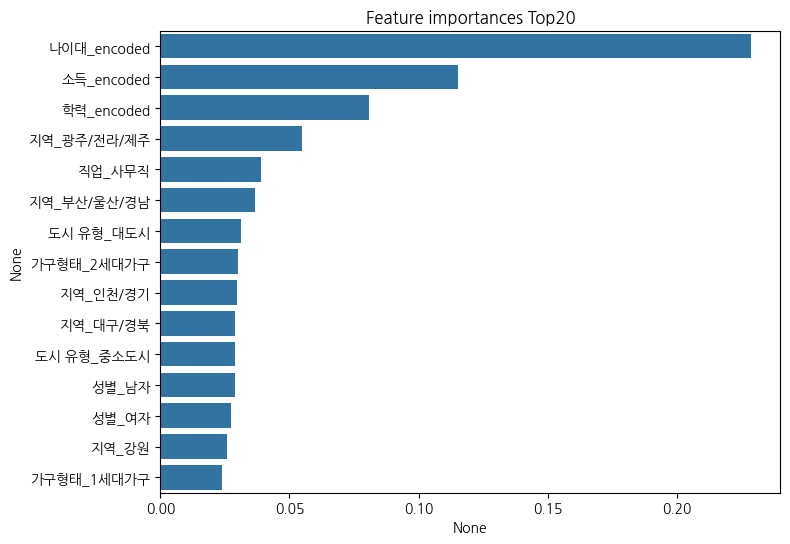

In [217]:
ftr_importances_values = model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:15]

plt.figure(figsize=(8,6))
plt.title("Feature importances Top20")
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [218]:
print(ftr_top20[:5])

나이대_encoded    0.228763
소득_encoded     0.115140
학력_encoded     0.080765
지역_광주/전라/제주    0.054678
직업_사무직         0.039130
dtype: float64


In [219]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# 서포트 벡터 머신 모델 생성
model_svm = SVC(class_weight='balanced', random_state=42)

# 모델 학습
model_svm.fit(X_train, y_train)

# 예측
y_pred_svm = model_svm.predict(X_test)

# 모델 성능 평가
print("Support Vector Machine Performance:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Performance:
              precision    recall  f1-score   support

           0       0.83      0.57      0.67      3190
           1       0.01      0.43      0.02         7
           2       0.42      0.63      0.51      1347

    accuracy                           0.59      4544
   macro avg       0.42      0.54      0.40      4544
weighted avg       0.71      0.59      0.62      4544



In [220]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# KNN 모델 생성
model_knn = KNeighborsClassifier()

# 모델 학습
model_knn.fit(X_train, y_train)

# 예측
y_pred_knn = model_knn.predict(X_test)

# 모델 성능 평가
print("K-Nearest Neighbors Performance:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Performance:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      3190
           1       0.00      0.00      0.00         7
           2       0.75      0.70      0.72      1347

    accuracy                           0.84      4544
   macro avg       0.54      0.53      0.54      4544
weighted avg       0.84      0.84      0.84      4544



c:\Users\eastm\.conda\envs\mtvs_env312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\eastm\.conda\envs\mtvs_env312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\eastm\.conda\envs\mtvs_env312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [221]:
from sklearn.metrics import classification_report

# 예측값과 실제값을 비교하여 평가 보고서를 출력합니다.
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.81      0.88      3190
           1       0.00      0.00      0.00         7
           2       0.69      0.90      0.78      1347

    accuracy                           0.84      4544
   macro avg       0.55      0.57      0.55      4544
weighted avg       0.87      0.84      0.85      4544

